# 10 Minutes to pandas

来自：
https://www.cnblogs.com/yan-lei/archive/2017/10/29/7718744.html  
https://pyzh.readthedocs.io/en/latest/python-pandas.html#id13


导入三剑客：

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 创建对象(Object Creation)

See the Data Structure Intro section.

Creating a Series by passing a list of values, letting pandas create a default integer index:

请参阅[数据结构简介部分](http://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dsintro "数据结构简介部分")

通过传递一个列表的值创建一个Series，让Pandas创建一个默认的整数索引：

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

通过传递的numpy数组创建一个DataFrame，并使用DataFrame索引和标记列：

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.227793,-0.605524,-0.927436,-0.798850
2013-01-02,-2.108468,0.561258,-0.342341,-1.041380
2013-01-03,1.749613,-0.279312,0.533015,-1.539562
2013-01-04,2.350106,0.122733,0.382069,1.144396
2013-01-05,1.259814,0.331269,0.046117,-0.849693
2013-01-06,1.259628,-1.161459,0.962626,0.070856


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

通过传递可转换成类似序列结构的字典序列来创建DataFrame。

In [5]:
 df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

In [6]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

查看不同列的数据类型

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

如果你使用的是IPython，可以使用Tab自动补全列名称（以及公共属性）。以下是将要完成的属性的一个子集：

In [8]:
 df2.info() # 无法演示tab键，演示一下这个函数

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
A    4 non-null float64
B    4 non-null datetime64[ns]
C    4 non-null float32
D    4 non-null int32
E    4 non-null category
F    4 non-null object
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 260.0+ bytes


## 查看数据(Viewing Data)
See the Basics section.

Here is how to view the top and bottom rows of the frame:

请参阅[基础部分](http://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics "基础部分")

查看frame中头部和尾部的行

In [9]:
df.head()

,A,B,C,D
2013-01-01,1.227793,-0.605524,-0.927436,-0.798850
2013-01-02,-2.108468,0.561258,-0.342341,-1.041380
2013-01-03,1.749613,-0.279312,0.533015,-1.539562
2013-01-04,2.350106,0.122733,0.382069,1.144396
2013-01-05,1.259814,0.331269,0.046117,-0.849693


In [10]:
df.tail(3)

,A,B,C,D
2013-01-04,2.350106,0.122733,0.382069,1.144396
2013-01-05,1.259814,0.331269,0.046117,-0.849693
2013-01-06,1.259628,-1.161459,0.962626,0.070856


Display the index, columns:
    
显示索引、行

In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that his can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

DataFrame.to_numpy()给出基础数据的NumPy表示。请注意，当您DataFrame拥有不同数据类型的列时，他的操作可能很昂贵，这可归结为pandas和NumPy之间的根本差异：NumPy数组对整个数组有一个dtype，而pandas DataFrames每列有一个dtype。当你调用DataFrame.to_numpy()，pandas会找到可以容纳 DataFrame中所有 dtypes 的NumPy dtype。这可能最终成为object，这需要将每个值都转换为Python对象。

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

对于df，DataFrame所有类型为浮点值 DataFrame.to_numpy()都很快，不需要复制数据。

In [13]:
df.values

array([[ 1.2277925 , -0.60552391, -0.92743552, -0.79885035],
       [-2.10846778,  0.56125826, -0.34234109, -1.04137994],
       [ 1.74961274, -0.27931151,  0.53301545, -1.53956219],
       [ 2.35010554,  0.12273257,  0.38206897,  1.14439581],
       [ 1.2598136 ,  0.33126882,  0.04611684, -0.84969294],
       [ 1.25962789, -1.16145911,  0.96262581,  0.0708564 ]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

对于df2，DataFrame具有多个dtypes， DataFrame.to_numpy()相对昂贵。

Note DataFrame.to_numpy() does not include the index or column labels in the output.

注意 DataFrame.to_numpy()的输出不包括索引或列标签。

describe() shows a quick statistic summary of your data:
显示您的数据的快速统计摘要：

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.956414,-0.171839,0.109008,-0.502372
std,1.563501,0.641296,0.673037,0.960756
min,-2.108468,-1.161459,-0.927436,-1.539562
25%,1.235751,-0.523971,-0.245227,-0.993458
50%,1.259721,-0.078289,0.214093,-0.824272
75%,1.627163,0.279135,0.495279,-0.146570
max,2.350106,0.561258,0.962626,1.144396


Transposing your data:
    
数据转置：

In [15]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.227793,-2.108468,1.749613,2.350106,1.259814,1.259628
B,-0.605524,0.561258,-0.279312,0.122733,0.331269,-1.161459
C,-0.927436,-0.342341,0.533015,0.382069,0.046117,0.962626
D,-0.798850,-1.041380,-1.539562,1.144396,-0.849693,0.070856


In [16]:
df.T.columns

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

Sorting by an axis:

按轴排序：

In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.798850,-0.927436,-0.605524,1.227793
2013-01-02,-1.041380,-0.342341,0.561258,-2.108468
2013-01-03,-1.539562,0.533015,-0.279312,1.749613
2013-01-04,1.144396,0.382069,0.122733,2.350106
2013-01-05,-0.849693,0.046117,0.331269,1.259814
2013-01-06,0.070856,0.962626,-1.161459,1.259628


Sorting by values:

按值排序：

In [18]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,1.259628,-1.161459,0.962626,0.070856
2013-01-01,1.227793,-0.605524,-0.927436,-0.798850
2013-01-03,1.749613,-0.279312,0.533015,-1.539562
2013-01-04,2.350106,0.122733,0.382069,1.144396
2013-01-05,1.259814,0.331269,0.046117,-0.849693
2013-01-02,-2.108468,0.561258,-0.342341,-1.041380


## 选择(Selection)
**Note: While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.**

**注意: 虽然标准的Python / numpy的表达式选择和设置直观，派上用场的互动工作，但是作为生产代码，我们建议优化的pandas数据访问方法，.at，.iat， .loc和.iloc。**

See the indexing documentation Indexing and Selecting Data and MultiIndex / Advanced Indexing.

请参阅索引文档 [索引和选择数据](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing") 和 [MultiIndex/高级索引](http://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced "MultiIndex/高级索引")


#### 读取(Getting)
Selecting a single column, which yields a Series, equivalent to df.A:

选择一个单独的列，返回一个Series，等同于 df.A

In [19]:
df['A']

2013-01-01    1.227793
2013-01-02   -2.108468
2013-01-03    1.749613
2013-01-04    2.350106
2013-01-05    1.259814
2013-01-06    1.259628
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

使用[]选择，对行进行切片。

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,1.227793,-0.605524,-0.927436,-0.798850
2013-01-02,-2.108468,0.561258,-0.342341,-1.041380
2013-01-03,1.749613,-0.279312,0.533015,-1.539562


In [21]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-2.108468,0.561258,-0.342341,-1.041380
2013-01-03,1.749613,-0.279312,0.533015,-1.539562
2013-01-04,2.350106,0.122733,0.382069,1.144396


#### 按标签选择(Selection by Label)
See more in Selection by Label.

For getting a cross section using a label:

详情参阅[标签选择](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label" "标签选择")

使用标签获取横截面

In [22]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [23]:
df.loc[dates[0]]

A    1.227793
B   -0.605524
C   -0.927436
D   -0.798850
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

通过标签选择多轴

In [24]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1.227793,-0.605524
2013-01-02,-2.108468,0.561258
2013-01-03,1.749613,-0.279312
2013-01-04,2.350106,0.122733
2013-01-05,1.259814,0.331269
2013-01-06,1.259628,-1.161459


Showing label slicing, both endpoints are included:

显示标签切片，两个端点被包括：

In [25]:
df.loc['20130102':'20130104', ['A', 'B']]#切片和花式索引

,A,B
2013-01-02,-2.108468,0.561258
2013-01-03,1.749613,-0.279312
2013-01-04,2.350106,0.122733


Reduction in the dimensions of the returned object:
    
降低返回对象维度：

In [26]:
df.loc['20130102', ['A', 'B']]

A   -2.108468
B    0.561258
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

获取标量值

In [27]:
df.loc[dates[0], 'A']

1.2277925042167888

For getting fast access to a scalar (equivalent to the prior method):

快速访问标量（同上一方法等价）

In [28]:
df.at[dates[0], 'A']

1.2277925042167888

#### 按位置选择(Selection by Position)
See more in Selection by Position.

详情参阅[按位置选择](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integerl" "按位置选择")

Select via the position of the passed integers:

通过传递整数选择位置：

In [29]:
df.iloc[3]

A    2.350106
B    0.122733
C    0.382069
D    1.144396
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

通过整数切片，类似于numpy/python

In [30]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,2.350106,0.122733
2013-01-05,1.259814,0.331269


By lists of integer position locations, similar to the numpy/python style:

通过列表指定位置，类似于numpy/python样式

In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-2.108468,-0.342341
2013-01-03,1.749613,0.533015
2013-01-05,1.259814,0.046117


For slicing rows explicitly:

对行切片

In [32]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-2.108468,0.561258,-0.342341,-1.041380
2013-01-03,1.749613,-0.279312,0.533015,-1.539562


For slicing columns explicitly:

对列切片

In [33]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.605524,-0.927436
2013-01-02,0.561258,-0.342341
2013-01-03,-0.279312,0.533015
2013-01-04,0.122733,0.382069
2013-01-05,0.331269,0.046117
2013-01-06,-1.161459,0.962626


For getting a value explicitly:

获取指定值

In [34]:
df.iloc[1,1]

0.5612582576418733

For getting fast access to a scalar (equivalent to the prior method):

快速访问标量（同上一方法等价）

In [35]:
df.iat[1,1]

0.5612582576418733

#### 布尔索引(Boolean Indexing)
Using a single column’s values to select data.

使用单列值选择数据：

In [36]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.227793,-0.605524,-0.927436,-0.798850
2013-01-03,1.749613,-0.279312,0.533015,-1.539562
2013-01-04,2.350106,0.122733,0.382069,1.144396
2013-01-05,1.259814,0.331269,0.046117,-0.849693
2013-01-06,1.259628,-1.161459,0.962626,0.070856


Selecting values from a DataFrame where a boolean condition is met.

从满足布尔条件的DataFrame中选择值。

In [37]:
df[df > 0]

,A,B,C,D
2013-01-01,1.227793,NaN,NaN,NaN
2013-01-02,NaN,0.561258,NaN,NaN
2013-01-03,1.749613,NaN,0.533015,NaN
2013-01-04,2.350106,0.122733,0.382069,1.144396
2013-01-05,1.259814,0.331269,0.046117,NaN
2013-01-06,1.259628,NaN,0.962626,0.070856


Using the isin() method for filtering:

使用isin()方法进行过滤

In [38]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,1.749613,-0.279312,0.533015,-1.539562,two
2013-01-05,1.259814,0.331269,0.046117,-0.849693,four


In [39]:
df2.query("E=='two' | E=='four'") # 和上一个命令等价

,A,B,C,D,E
2013-01-03,1.749613,-0.279312,0.533015,-1.539562,two
2013-01-05,1.259814,0.331269,0.046117,-0.849693,four


#### 设置(Setting)
Setting a new column automatically aligns the data by the indexes.

设置新列会自动根据索引对齐数据。

In [40]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,1.227793,-0.605524,-0.927436,-0.798850,NaN
2013-01-02,-2.108468,0.561258,-0.342341,-1.041380,1.0
2013-01-03,1.749613,-0.279312,0.533015,-1.539562,2.0
2013-01-04,2.350106,0.122733,0.382069,1.144396,3.0
2013-01-05,1.259814,0.331269,0.046117,-0.849693,4.0
2013-01-06,1.259628,-1.161459,0.962626,0.070856,5.0


Setting values by label:

按标签设置值：

In [41]:
df.at[dates[0], 'A'] = 0

Setting values by position:

按位置设置值

In [42]:
 df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

通过numpy数组设置

In [43]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations.

先前设置操作的结果。

In [44]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.927436,5,NaN
2013-01-02,-2.108468,0.561258,-0.342341,5,1.0
2013-01-03,1.749613,-0.279312,0.533015,5,2.0
2013-01-04,2.350106,0.122733,0.382069,5,3.0
2013-01-05,1.259814,0.331269,0.046117,5,4.0
2013-01-06,1.259628,-1.161459,0.962626,5,5.0


A where operation with setting.

where操作赋值

In [45]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.927436,-5,NaN
2013-01-02,-2.108468,-0.561258,-0.342341,-5,-1.0
2013-01-03,-1.749613,-0.279312,-0.533015,-5,-2.0
2013-01-04,-2.350106,-0.122733,-0.382069,-5,-3.0
2013-01-05,-1.259814,-0.331269,-0.046117,-5,-4.0
2013-01-06,-1.259628,-1.161459,-0.962626,-5,-5.0


## 缺失数据(Missing Data)
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Pandas主要使用np.nan来表示缺失数据。**默认情况下不包括在计算中**。请参阅[缺失数据部分](http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data" "缺失数据部分")

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.
重建索引允许修改/添加/删除指定轴的索引，并返回数据副本。

In [46]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.927436,5,NaN,1.0
2013-01-02,-2.108468,0.561258,-0.342341,5,1.0,1.0
2013-01-03,1.749613,-0.279312,0.533015,5,2.0,NaN
2013-01-04,2.350106,0.122733,0.382069,5,3.0,NaN


To drop any rows that have missing data.
删除所有包含缺少数据的行。

In [47]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-2.108468,0.561258,-0.342341,5,1.0,1.0


Filling missing data.
填写缺失的数据行

In [48]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.927436,5,5.0,1.0
2013-01-02,-2.108468,0.561258,-0.342341,5,1.0,1.0
2013-01-03,1.749613,-0.279312,0.533015,5,2.0,5.0
2013-01-04,2.350106,0.122733,0.382069,5,3.0,5.0


In [49]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.927436,5,NaN,1.0
2013-01-02,-2.108468,0.561258,-0.342341,5,1.0,1.0
2013-01-03,1.749613,-0.279312,0.533015,5,2.0,NaN
2013-01-04,2.350106,0.122733,0.382069,5,3.0,NaN


To get the boolean mask where values are nan.

获取nan值所在的布尔掩码。

In [50]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [51]:
df1.isnull()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [52]:
df1.isnull() == df1.isna()

,A,B,C,D,F,E
2013-01-01,True,True,True,True,True,True
2013-01-02,True,True,True,True,True,True
2013-01-03,True,True,True,True,True,True
2013-01-04,True,True,True,True,True,True


## 运算(Operations)
See the Basic section on Binary Ops.

请参阅二进制运算的基础部分[二进制运算的基础部分](http://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-binop "二进制运算的基础部分")

#### 统计(Stats)
Operations in general exclude missing data.

Performing a descriptive statistic:

**运算一般排除丢失的数据。**

执行描述性统计:

In [53]:
df.mean()

A    0.751782
B   -0.070918
C    0.109008
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

在其他轴上执行相同的运算

In [54]:
df.mean(1)

2013-01-01    1.018141
2013-01-02    0.822090
2013-01-03    1.800663
2013-01-04    2.170981
2013-01-05    2.127440
2013-01-06    2.212159
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

使用具有不同维度且需要对齐的对象进行操作。此外，pandas会自动**沿指定维度进行广播**。

In [55]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [56]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.749613,-1.279312,-0.466985,4.0,1.0
2013-01-04,-0.649894,-2.877267,-2.617931,2.0,0.0
2013-01-05,-3.740186,-4.668731,-4.953883,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


#### 应用(Apply)
Applying functions to the data:

将函数应用于数据

In [57]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.927436,5,NaN
2013-01-02,-2.108468,0.561258,-0.342341,5,1.0
2013-01-03,1.749613,-0.279312,0.533015,5,2.0
2013-01-04,2.350106,0.122733,0.382069,5,3.0
2013-01-05,1.259814,0.331269,0.046117,5,4.0
2013-01-06,1.259628,-1.161459,0.962626,5,5.0


In [58]:
df.apply(np.cumsum)#沿给定轴返回元素的累积和

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.927436,5,NaN
2013-01-02,-2.108468,0.561258,-1.269777,10,1.0
2013-01-03,-0.358855,0.281947,-0.736761,15,3.0
2013-01-04,1.991250,0.404679,-0.354692,20,6.0
2013-01-05,3.251064,0.735948,-0.308575,25,10.0
2013-01-06,4.510692,-0.425511,0.654050,30,15.0


In [59]:
df.apply(lambda x: x.max() - x.min())

A    4.458573
B    1.722717
C    1.890061
D    0.000000
F    4.000000
dtype: float64

In [60]:
df.max() - df.min()

A    4.458573
B    1.722717
C    1.890061
D    0.000000
F    4.000000
dtype: float64

#### 直方图(Histogramming)
See more at Histogramming and Discretization.

详情请请参[阅直方图和离散化](http://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-discretization "直方图和离散化")

In [61]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    3
2    2
3    4
4    1
5    5
6    1
7    2
8    4
9    6
dtype: int32

In [62]:
s.value_counts()

2    3
4    2
1    2
6    1
5    1
3    1
dtype: int64

#### 字符串方法(String Methods)
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

Series在字符串中设置了一组字符串处理方法，可以方便地对数组中每个元素进行操作，如下面代码片段所示。请注意，字符串中的模式匹配默认使用正则表达式。（在某些情况下总是使用它们）。详情请参[阅矢量字符串方法](http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods "阅矢量字符串方法")

In [63]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 合并(Merge)
#### 连接(Concat)
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the Merging section.

在连接/合并类型操作的情况下，Pandas提供了一些具有用于索引和关系代数的各种函数合并Series、DataFrame和Panel对象的方法

请参阅[合并部分](http://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging "合并部分")

Concatenating pandas objects together with concat():

使用concat()把Pandas对象连接：

In [64]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.616294,-0.056527,-1.013209,-0.575040
1,-2.054452,-0.168814,-0.562313,0.157437
2,-1.118753,-1.320902,-0.252701,-0.755615
3,0.407460,-1.398860,0.631001,-0.235197
4,-1.928588,2.214710,0.566212,-1.052630
5,0.561049,-1.199537,-0.278456,0.212709
6,-1.730381,0.624625,-0.977116,-1.214368
7,1.146841,0.057089,0.948156,-1.302736
8,-2.379261,2.311357,-1.251934,-0.315982
9,-0.975750,0.560092,-0.389923,0.724025


In [65]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.616294,-0.056527,-1.013209,-0.575040
1,-2.054452,-0.168814,-0.562313,0.157437
2,-1.118753,-1.320902,-0.252701,-0.755615
3,0.407460,-1.398860,0.631001,-0.235197
4,-1.928588,2.214710,0.566212,-1.052630
5,0.561049,-1.199537,-0.278456,0.212709
6,-1.730381,0.624625,-0.977116,-1.214368
7,1.146841,0.057089,0.948156,-1.302736
8,-2.379261,2.311357,-1.251934,-0.315982
9,-0.975750,0.560092,-0.389923,0.724025


####  连接(Join)
SQL style merges. See the Database style joining section.

SQL风格合并。请参阅[数据库风格连接](http://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join "")

In [66]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [67]:
right

,key,rval
0,foo,4
1,foo,5


In [68]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

给出另一个例子：

In [69]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [70]:
right

,key,rval
0,foo,4
1,bar,5


In [71]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### 追加(Append)
Append rows to a dataframe. See the Appending section.

添加行到DataFrame。请参阅[追加](http://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-concatenation "")

In [72]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.919122,1.263056,1.844222,0.734109
1,0.257520,2.013197,0.207861,0.486549
2,-0.801722,0.819088,2.044567,-0.909221
3,0.758638,-0.831770,-0.375088,-1.259795
4,1.418063,1.795254,0.539484,-0.358525
5,-0.400800,1.378761,-1.783118,0.276162
6,-0.025823,0.776404,-0.994148,0.018226
7,-0.333848,0.188588,-0.722955,1.577483


In [73]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.919122,1.263056,1.844222,0.734109
1,0.257520,2.013197,0.207861,0.486549
2,-0.801722,0.819088,2.044567,-0.909221
3,0.758638,-0.831770,-0.375088,-1.259795
4,1.418063,1.795254,0.539484,-0.358525
5,-0.400800,1.378761,-1.783118,0.276162
6,-0.025823,0.776404,-0.994148,0.018226
7,-0.333848,0.188588,-0.722955,1.577483
8,0.758638,-0.831770,-0.375088,-1.259795


In [74]:
df.append(s,)

,A,B,C,D
0,-0.919122,1.263056,1.844222,0.734109
1,0.257520,2.013197,0.207861,0.486549
2,-0.801722,0.819088,2.044567,-0.909221
3,0.758638,-0.831770,-0.375088,-1.259795
4,1.418063,1.795254,0.539484,-0.358525
5,-0.400800,1.378761,-1.783118,0.276162
6,-0.025823,0.776404,-0.994148,0.018226
7,-0.333848,0.188588,-0.722955,1.577483
3,0.758638,-0.831770,-0.375088,-1.259795


## 分组(Grouping)
By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria  
* Applying a function to each group independently  
* Combining the results into a data structure  

See the Grouping section.

"分组"我们指的是涉及一个或多个以下步骤的过程

* Splitting：根据一些标准将数据分组  
* Applying：将功能独立应用于每个组  
* Combining：将结果合并成数据结构  

请参阅[分组部分](http://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby "")

In [75]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.167928,0.721684
1,bar,one,-2.177810,1.125865
2,foo,two,0.283916,1.204444
3,bar,three,0.409865,-0.019822
4,foo,two,-0.214041,0.284701
5,bar,two,-0.107730,0.387093
6,foo,one,0.549281,-1.072444
7,foo,three,1.782423,-0.939127


Grouping and then applying the sum() function to the resulting groups.

分组，然后将sum()函数应用于生成的组。

In [76]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.875675,1.493137
foo,1.233650,0.199258


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

按多列分组形成层次索引，然后应用该函数。

In [77]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -2.177810  1.125865
    three  0.409865 -0.019822
    two   -0.107730  0.387093
foo one   -0.618648 -0.350760
    three  1.782423 -0.939127
    two    0.069875  1.489145

## 重塑(Reshaping)
See the sections on Hierarchical Indexing and Reshaping.

请参阅有关[分层索引]( "http://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical")和[重塑部分]( "http://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking")。

In [78]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [79]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [80]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.206537 -0.627744
      two    -1.207553  0.642753
baz   one    -0.498022 -0.202075
      two     0.004607  0.553299
foo   one     0.147654  2.699198
      two    -0.124434  0.811871
qux   one     0.895304 -0.326753
      two     0.133175  1.400536

In [81]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.206537 -0.627744
      two    -1.207553  0.642753
baz   one    -0.498022 -0.202075
      two     0.004607  0.553299

The stack() method “compresses” a level in the DataFrame’s columns.

stack()方法将"压缩"DataFrame列中的一个级别。

In [82]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.206537
               B   -0.627744
       two     A   -1.207553
               B    0.642753
baz    one     A   -0.498022
               B   -0.202075
       two     A    0.004607
               B    0.553299
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

使用"stacked"DataFrame或Series（有一个MultilIndex作为索引）stack()的反向操作是unstack()，它默认情况下解除最后一个级别

In [83]:
stacked.unstack()#level=-1

A         B
first second                    
bar   one     1.206537 -0.627744
      two    -1.207553  0.642753
baz   one    -0.498022 -0.202075
      two     0.004607  0.553299

In [84]:
stacked.unstack(level=1)

second        one       two
first                      
bar   A  1.206537 -1.207553
      B -0.627744  0.642753
baz   A -0.498022  0.004607
      B -0.202075  0.553299

In [85]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.206537 -0.498022
       B -0.627744 -0.202075
two    A -1.207553  0.004607
       B  0.642753  0.553299

## 数据透视表()
See the section on Pivot Tables.

请参阅[数据透视表部分]( "http://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot")。

In [86]:
 df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.552392,0.325164
1,one,B,foo,-1.684563,1.174539
2,two,C,foo,0.655166,0.545614
3,three,A,bar,-0.030436,-0.331908
4,one,B,bar,0.315533,-0.202050
5,one,C,bar,0.253961,0.105152
6,two,A,foo,0.024750,-0.560698
7,three,B,foo,-1.598326,0.734759
8,one,C,foo,-0.616519,-0.952973
9,one,A,bar,-0.379087,1.790356


We can produce pivot tables from this data very easily:

我们可以轻松地从这些数据中快速生成数据透视表：

In [87]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.379087  1.552392
      B  0.315533 -1.684563
      C  0.253961 -0.616519
three A -0.030436       NaN
      B       NaN -1.598326
      C  1.986404       NaN
two   A       NaN  0.024750
      B  0.723808       NaN
      C       NaN  0.655166

## 时间序列(Time Series)
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

Pandas具有简单、强大和高效的功能，用于在变频期间执行重采样操作。这在金融应用中非常常见，但是不限于此。请参阅[时间序列部分](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries "")

In [88]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()#将随机产生的秒级数据整合成5min的数据

2012-01-01    26807
Freq: 5T, dtype: int32

Time zone representation:

时区表示

In [89]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.799837
2012-03-07    0.563593
2012-03-08    1.682522
2012-03-09   -1.353503
2012-03-10    1.579805
Freq: D, dtype: float64

In [90]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.799837
2012-03-07 00:00:00+00:00    0.563593
2012-03-08 00:00:00+00:00    1.682522
2012-03-09 00:00:00+00:00   -1.353503
2012-03-10 00:00:00+00:00    1.579805
Freq: D, dtype: float64

Converting to another time zone:

转换到另一时区

In [91]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.799837
2012-03-06 19:00:00-05:00    0.563593
2012-03-07 19:00:00-05:00    1.682522
2012-03-08 19:00:00-05:00   -1.353503
2012-03-09 19:00:00-05:00    1.579805
Freq: D, dtype: float64

Converting between time span representations:

在时间跨度之间转换

In [92]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.604655
2012-02-29    0.218519
2012-03-31    1.211123
2012-04-30   -1.557026
2012-05-31   -0.830987
Freq: M, dtype: float64

In [93]:
ps = ts.to_period()#注:to_period()默认频率为M，to_period和to_timestamp可以相互转换
ps

2012-01    1.604655
2012-02    0.218519
2012-03    1.211123
2012-04   -1.557026
2012-05   -0.830987
Freq: M, dtype: float64

In [94]:
ps.to_timestamp()

2012-01-01    1.604655
2012-02-01    0.218519
2012-03-01    1.211123
2012-04-01   -1.557026
2012-05-01   -0.830987
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

在时间和时间戳之间转换，可以使用一些方便的算术函数。在下面例子中：将季度时间转换为各季度最后一个月的09am:

In [95]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [96]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.587770
1990-06-01 09:00    0.888155
1990-09-01 09:00   -0.128880
1990-12-01 09:00   -0.783176
1991-03-01 09:00    1.245037
Freq: H, dtype: float64

## 分类(Categoricals)
pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

自0.15版本以来，Pandas可以在DataFrame中包含分类数据。有关完整文档，请参阅[分类介绍](http://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical "")和[API文档](http://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical "")。

In [97]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

将原始数据转换为分类数据。

In [98]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

将类别重命名为更有意义的名称

In [99]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

重新排列类别并同时添加丢失的类别（Series.cat下的方法返回一个默认的新Series）。

In [100]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

排序是按类别中的顺序排序的，而不是词汇顺序。

In [101]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories.

按类别分组也包括空类别:

In [102]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图(Plotting)
See the Plotting docs.

[绘图](http://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization "")文档

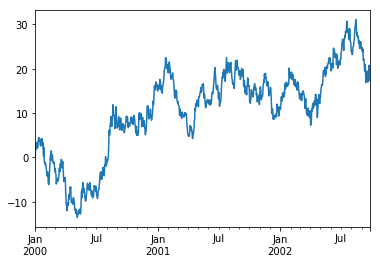

In [103]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

在DataFrame中，[plot()](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot "")可以方便绘制带标签的所有列。

<Figure size 432x288 with 0 Axes>

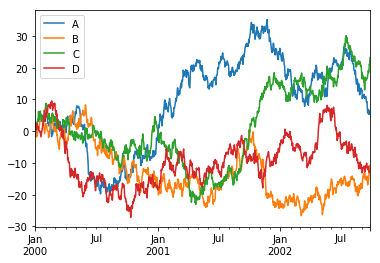

In [104]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

## 数据输入/输出(Getting Data In/Out)
### CSV
[Writing to a csv file.](http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv "")
```python
df.to_csv('foo.csv')
```

[Reading from a csv file.](http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table "")
```python
pd.read_csv('foo.csv')
```

### HDF5
Reading and writing to [HDFStores.](http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5 "")

Writing to a HDF5 Store.
```python
df.to_hdf('foo.h5', 'df')
```

Reading from a HDF5 Store.
```python
pd.read_hdf('foo.h5', 'df')
```

### Excel
Reading and writing to [MS Excel.](http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel "")

Writing to an excel file.
```python
df.to_excel('foo.xlsx', sheet_name='Sheet1')
```

Reading from an excel file.
```python
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
```

## 陷阱(Gotchas)
If you are attempting to perform an operation you might see an exception like:

如果你尝试以下操作，可以看到如下异常：
```python
>>> if pd.Series([False, True, False]):
...     print("I was true")
Traceback
    ...
ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().
```

See Comparisons for an explanation and what to do.

See Gotchas as well.

请查看 [Comparisons](http://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-compare "") , 查看 [Gotchas](http://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas "") 也可以